In [1]:
# Import Libraries 
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# read in all our data
diabet_data = pd.read_csv("/kaggle/input/diabetic-data-cleaning/diabetic_data.csv")
data =pd.read_csv('/kaggle/input/preprocessed-data/DataPreprocessing.csv')
#fetch requred data
target = diabet_data[['gender', 'readmitted']]

target.head()


,gender,readmitted
0,Female,NO
1,Female,>30
2,Female,NO
3,Male,NO
4,Male,NO


In [2]:
# Convert string to numbers
target = target.replace(['Female','Male','NO','>30','<30'],[0,1,2,1,0])
target = target.drop('gender', axis=1)
df = data.join(target)


In [3]:
df.head()

,race,gender,age,num_procedures,num_medications,number_emergency,number_inpatient,max_glu_serum,A1Cresult,insulin,...,diag_1_category,diag_2_category,diag_3_category,sulfonylureas,biguanides,thiazolidinediones,meglitinides,alpha_glucosidase_inhibitors,other_combination_therapies,readmitted
0,2,0,20.0,0,0.0000,0,0.0,2,2,1,...,1.5,1,1,0,0,0,0,0,0,2
1,2,0,20.0,0,0.2125,0,0.0,2,2,3,...,1.5,1,1,0,0,0,0,0,0,1
2,2,0,20.0,5,0.1500,0,1.0,2,2,1,...,4.0,1,6,1,0,0,0,0,0,2
3,2,1,30.0,1,0.1875,0,0.0,2,2,3,...,5.0,1,3,0,0,0,0,0,0,2
4,2,1,40.0,0,0.0875,0,0.0,2,2,2,...,1.5,0,1,1,0,0,0,0,0,2


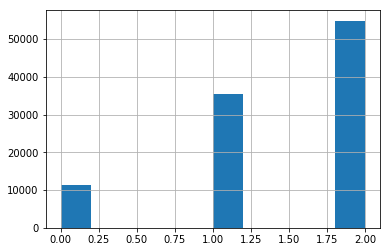

In [4]:
# show histograms of readmitted
df = df.readmitted.hist()
plt.show()

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming 'df' is your DataFrame

# Define features (X) and target (y)
X = data  # Drop the 'readmitted' column from features
y = target  # The 'readmitted' column is the target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)

# Fit the model
model_lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lr)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_lr)}")


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Evaluation:
Accuracy: 1.0
Confusion Matrix:
[[ 2285     0     0]
 [    0  7117     0]
 [    0     0 10952]]
Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2285
          1       1.00      1.00      1.00      7117
          2       1.00      1.00      1.00     10952

avg / total       1.00      1.00      1.00     20354

